# Lending Club Case Study - Exploratory Data Analysis

#### Group Members:
1. Aditya Kritwik
2. Vivek Mehta

### Business Understanding:
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These     candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


### Business Objectives:

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

###### The analysis is divided into four main parts:

1. Data understanding
2. Data cleaning
3. Exploratory Data Analysis
4. Conclusions

In [1]:
#importing all the required libraries for the analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data from csv
loan = pd.read_csv("loan.csv")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Understanding

In [3]:
# let's look at the first few rows of the dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Total number of rows and columns
loan.shape

(39717, 111)

Some of the important columns in the dataset are loan_amnt, term, int_rate, grade, annual_inc, purpose of the loan etc.

We can assume the **Target variable** here to be '**loan status**'. The strategy is to figure out compare the average default rates across various independent variables and identify the ones that affect default rate the most.

## Data Cleaning

In [5]:
# checking number of missing values in each column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

As we can see there are many columns with no valid values, we will drop these columns.

In [6]:
#drop columns with no valid values
loan = loan.dropna(axis=1,thresh=1)
loan.shape

(39717, 57)

In [7]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

**As we can still notice a few columns with many null values, It would be better to discard columns with high number of missing/null values. After that we can check columns with considerable null values to check whether we need to drop this or not.**

In [8]:
#drop columns with lesser number of valid values
loan = loan.dropna(axis=1,thresh=20000)
loan.shape

(39717, 54)

In [9]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
# There is now 1 column having more than 10000 missing values.(desc)

# let's have a look at a few entries in this column
loan.loc[:4, ['desc']]

,desc
0,Borrower added on 12/22/11 > I need to upgra...
1,Borrower added on 12/22/11 > I plan to use t...
2,NaN
3,Borrower added on 12/21/11 > to pay for prop...
4,Borrower added on 12/21/11 > I plan on combi...


The column 'desc' contains the comments which the applicant had written while applying for the loan. Although we can use some text analysis techniques to derive new metrics from this column (such as sentiment or number of positive/negative words), we will not use this column in this analysis.

In [11]:
# dropping the column
loan = loan.drop(['desc'], axis=1)
loan.shape

(39717, 53)

In [12]:
# checking missing values in rows
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [13]:
# checking whether some rows have more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

The row data looks clean and large enough for analysis. Let's also check the remaining columns.

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [15]:
#checking the uniqueness of values in different columns
loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

As clearly visible from above, there are few columns with only 1 unique value. These will not be of much help in our analysis. Hence, we will drop these columns.

In [16]:
#dropping columns with only 1 unique value
drop_columnlist = ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan']
loan = loan.drop(drop_columnlist,axis=1)
loan.shape

(39717, 44)

Since we are looking to find out the driving factors for an applicant to be a defaulter, we would not need columns like member_id, id and url since these columns would not affect whether a person turns out to be a defaulter or not.

In [17]:
#let's now remove the applicant variables from analysis
loan = loan.drop(['member_id', 'id', 'url'], axis=1)
loan.shape

(39717, 41)

In [18]:
# Lets remove % symbol from intrest rate column so that it can be used in calculations
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
loan['revol_util'] = loan['revol_util'].str.rstrip('%')

In [19]:
loan.emp_length

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

In [20]:
# Lets format employment length column to have only numbers. It may play important role in further analysis.

loan.emp_length.fillna('0',inplace=True)
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
loan.emp_length.head(2)

0    10
1     1
Name: emp_length, dtype: object

In [21]:
# convert few columns into numeric data
col = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan[col] = loan[col].apply(pd.to_numeric)

In [22]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [23]:
loan.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

In [24]:
#pub_rec_bankruptcies column might be useful for our analysis. Hence imputing null values.
loan.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

In [25]:
loan.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

## Exploratory Data Analysis

In [26]:
# Lets take a look at the Target variable --> loan status.
loan.loan_status.value_counts()*100/len(loan)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

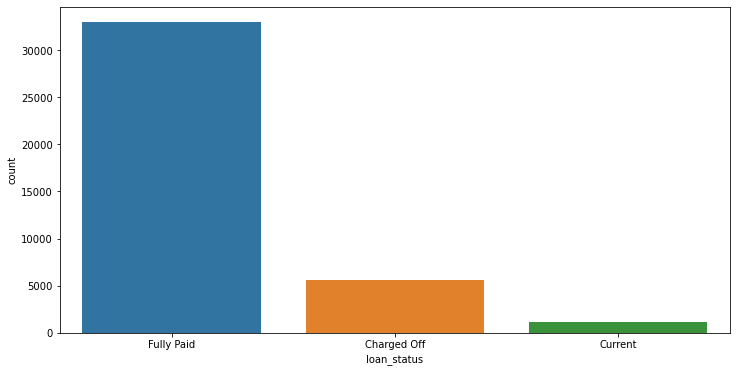

In [27]:
#Plotting counts for loan_status
plt.figure(figsize=(12, 6))
sns.countplot(x='loan_status', data=loan)
plt.show()

Observations: 
82% loans were fully paid. 14% loans were charged off. As we cannot derive much conclusions where the loan_status is current,It would be better to discard all rows having loan_status as current.

In [28]:
# filtering loan_status so that i only contains fully paid or charged-off
loan = loan[loan['loan_status'] != 'Current']

#deriving new column which contains a boolean whether or a loan is charged off.
loan['defaulter'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# summarising the values
loan['defaulter'].value_counts()

0    32950
1     5627
Name: defaulter, dtype: int64

In [29]:
#Lets take a look on important variable purpose of loan in total loans issued

loan.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

Observations : 
Most of the loans taken for debt consolidation and Credit card bill payment.
Other is also one of the main purpose of the loans.

In [30]:
# Derived columns
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan['issue_year']=loan['issue_d'].dt.year
loan['issue_month']=loan['issue_d'].dt.month

loan.head(1)

# Observations
# Two new columns month and year were derived from issue date

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,defaulter,issue_year,issue_month
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,...,0.0,0.0,0.0,Jan-15,171.62,May-16,0,0,2011,12


In [31]:
# Let's find default rate
round(np.mean(loan['defaulter']), 2)

0.15

### The default rate for the loan applicants other than current applicants is 15% 

Now, Let's visualise the average default rates across categorical variables.

In [32]:
# lets define a function to plot defaulters rates' across categorical variables
def defaulted(categorical_variable):
    sns.barplot(x=categorical_variable, y='defaulter', data=loan)
    plt.show()

#### 

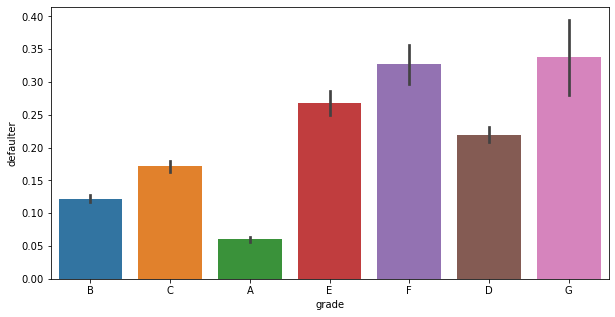

In [33]:
# compare default rates across grade of loan
plt.figure(figsize=(10,5))
defaulted('grade')

Clearly, as the grade of loan goes from A to G, the default rate increases. This is as expected since the grade is decided by Lending Club based on the risk factor of the loan.

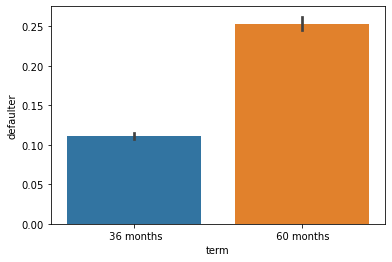

In [34]:
#compare default rates across different terms of the loan
defaulted('term')

Clearly, The loans with term as 60 months default more than the loans with 36 months.

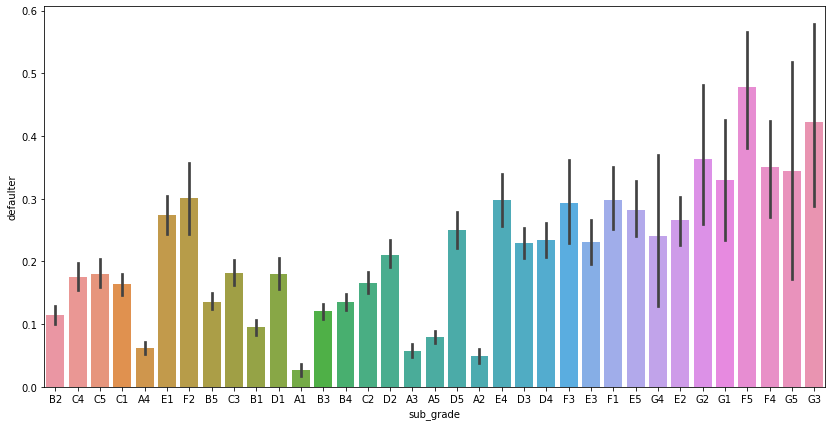

In [35]:
# compare default rates across subgrades of the loan.
plt.figure(figsize=(14, 7))
defaulted('sub_grade')

Clearly, as the subgrade of the loan goes from A1 to A5, the tendency to default increases. This is as expected since the subgrade is decided by Lending Club based on the risk factor of the loan.

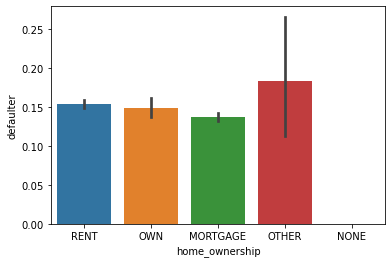

In [36]:
# compare default rates across different types of home-ownership of the loan.
defaulted('home_ownership')

Home-ownership doesn't seem to have much impact on the tendency to default.

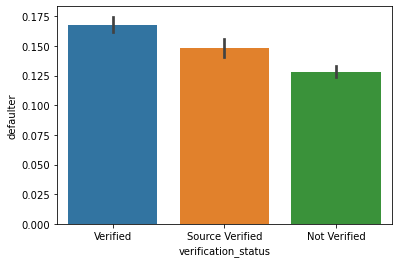

In [37]:
# compare default rates across verification status of the loan.
defaulted('verification_status')

Surprisingly, the verified applicants have more tendency to default than the ones who are not verified.

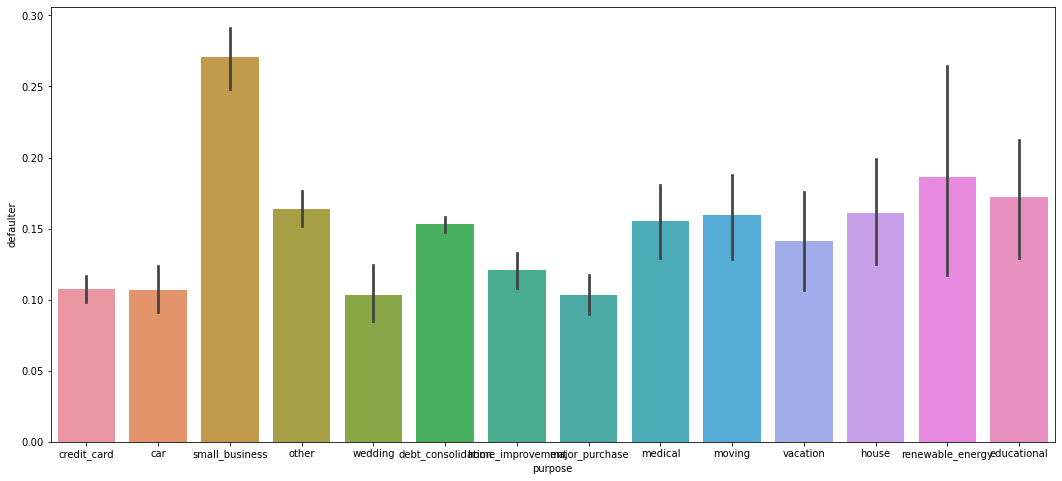

In [38]:
# compare default rates across different purposes of the loan.
plt.figure(figsize=(18,8))
defaulted('purpose')

From the above plot, it is clear that loans taken for small business have the most tendency to default followed by renewable energy and education. Whereas it is also visible that loans taken for credit card, car, wedding purpose are less likely to be charged off.

In [39]:
# let's observe the number of loans granted across years
loan.groupby('issue_year').issue_year.count()

issue_year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: issue_year, dtype: int64

We can see that the number of loans has increased every year.

In [40]:
# let's also observe the number of loans across months
loan.groupby('issue_month').issue_month.count()

issue_month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: issue_month, dtype: int64

We can observe from the above data that Most loans are granted in December, 
and in general in the latter half of the year. i.e. July to Decmber.

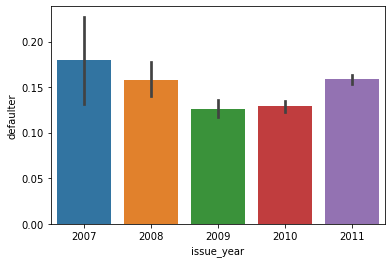

In [41]:
# comparing default rates across years.
defaulted('issue_year')

The default rate has been decreasing over the years with an exception being 2011.

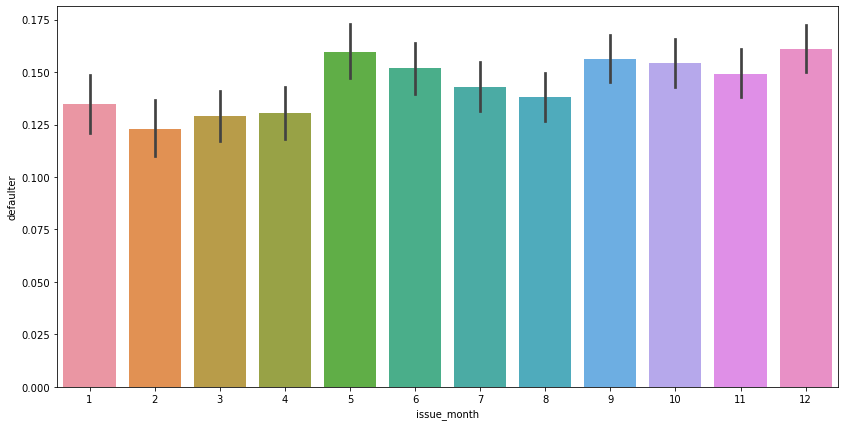

In [42]:
# comparing default rates across months
plt.figure(figsize=(14, 7))
defaulted('issue_month')

We can observe that there is aan irregular change in tendency to default across the months. Hence, we can say that default tendency is most likely to be independent of the month in which the loan is taken.

Let's check continuous variables now.

In [43]:
#Let's check loan_amnt first
loan.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [44]:
# binning loan amount
def binning(n):
    if n < quantil['25%']:
        return 'low'
    elif n >=quantil['25%'] and n < quantil['50%']:
        return 'medium'
    elif n >= quantil['50%'] and n < quantil['75%']:
        return 'high'
    else:
        return 'very high'

quantil = loan.loan_amnt.describe()        
loan['loan_amnt_bin'] = loan.loan_amnt.apply(binning)

In [45]:
loan.loan_amnt_bin.head()

0     low
1     low
2     low
3    high
5     low
Name: loan_amnt_bin, dtype: object

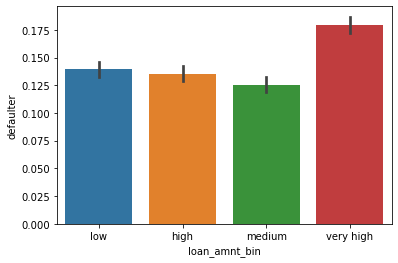

In [46]:
# let's compare the default rates across loan amount type.
defaulted('loan_amnt_bin')

Very High loan amount is most likely to be defaulted. Also amounts lower than 25 percentile have high default rate.

In [47]:
# let's also convert funded amount invested to bins
quantil = loan.funded_amnt_inv.describe()  
loan['funded_amnt_inv_bin'] = loan['funded_amnt_inv'].apply(binning)

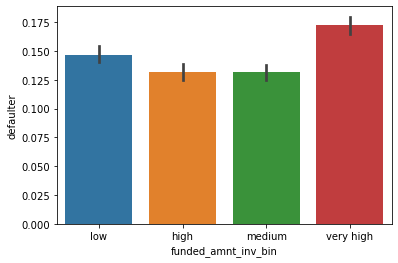

In [48]:
# let's compare the default rates across amount invested type.
defaulted('funded_amnt_inv_bin')

Very High investment amount is most likely to be defaulted. Also investment amounts lower than 25 percentile have high default rate.

In [49]:
# lets also convert interest rate
quantil = loan.int_rate.describe()
loan['int_rate_bin'] = loan['int_rate'].apply(binning)

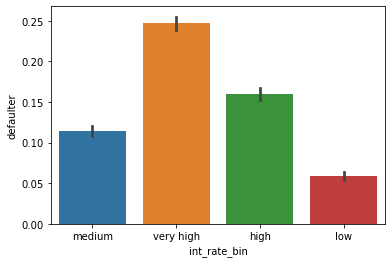

In [50]:
# let's compare the default rates across amount interest rates.
defaulted('int_rate_bin')

Higher the interest rate, Higher is the default rate.

In [51]:
# lets also convert dti
quantil = loan.dti.describe()
loan['dti_bin'] = loan['dti'].apply(binning)

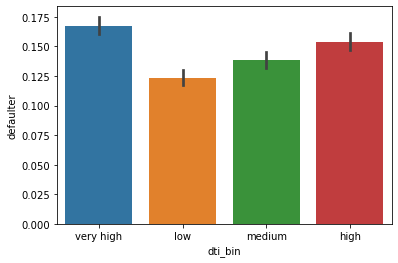

In [52]:
# let's compare the default rates across dti.
defaulted('dti_bin')

Higher the dti, Higher is the default rate.

In [53]:
# lets also convert funded_amnt
quantil = loan.funded_amnt.describe()
loan['funded_amnt_bin'] = loan['funded_amnt'].apply(binning)

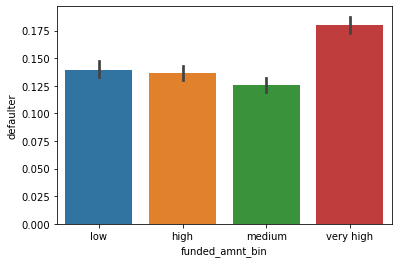

In [54]:
# let's compare the default rates across different levels of funded_amnt.
defaulted('funded_amnt_bin')

We can observe that there is an irregular change in tendency to default across the funded amounts. Hence, we can say that default tendency is most likely to be independent of the funded amount.

In [55]:
# lets also convert installments
quantil = loan.installment.describe()
loan['installment_bin'] = loan['installment'].apply(binning)

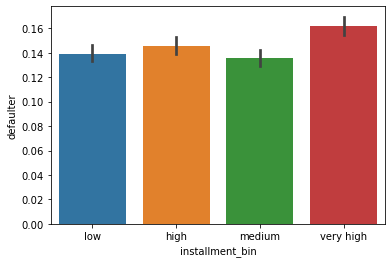

In [56]:
# let's compare the default rates across different levels of installments.
defaulted('installment_bin')

High/Very high installments are most prone to defaulting

In [57]:
# lets also convert annual_inc
quantil = loan.annual_inc.describe()
loan['annual_inc_bin'] = loan['annual_inc'].apply(binning)

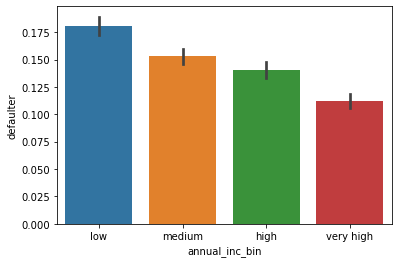

In [58]:
# let's compare the default rates across different levels of annual incomes.
defaulted('annual_inc_bin')

As the annual income increases, the tendency to default a loan is lower.

In [59]:
# lets also convert emp_length
quantil = loan.emp_length.describe()
loan['emp_length_bin'] = loan['emp_length'].apply(binning)

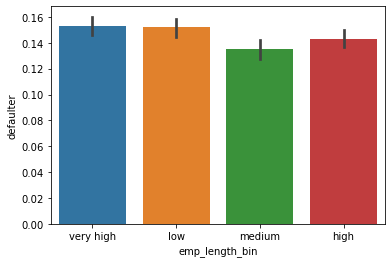

In [60]:
# let's compare the default rates across different levels of employment lengths.
defaulted('emp_length_bin')

Employment length is not a good predictor of defaulting loans.

We have compared the default rates across various variables, and some of the important predictors turn out to be purpose of the loan, interest rate, annual income, grade, term of the loan, etc.